# Overlay Solar Elevation and Solar Eclipse Time Series
This notebook demonstrates how to use a solarTimeseries object to easily overplot the solar elevation angle and solar eclipse obscuration on a matplotlib timeseries axis.

In [1]:
import datetime
import matplotlib as mpl
from matplotlib import pyplot as plt
import eclipse_calc

%matplotlib inline

In [2]:
plt.rcParams['font.size']        = 18
plt.rcParams['font.weight']      = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.grid']        = True
plt.rcParams['axes.xmargin']     = 0
plt.rcParams['grid.linestyle']   = ':'

## Create solarTimeseries Object

In [3]:
# Set Lat/Lon to W2NAF in Spring Brook Township, PA
lat =  41.335116
lon = -75.600692

# Set Start and End Times
sTime = datetime.datetime(2024,4,8)
eTime = datetime.datetime(2024,4,9)

In [4]:
# Create Solar Time Series Object
solar = eclipse_calc.solarContext.solarTimeseries(sTime,eTime,lat,lon)

## Plot the Results

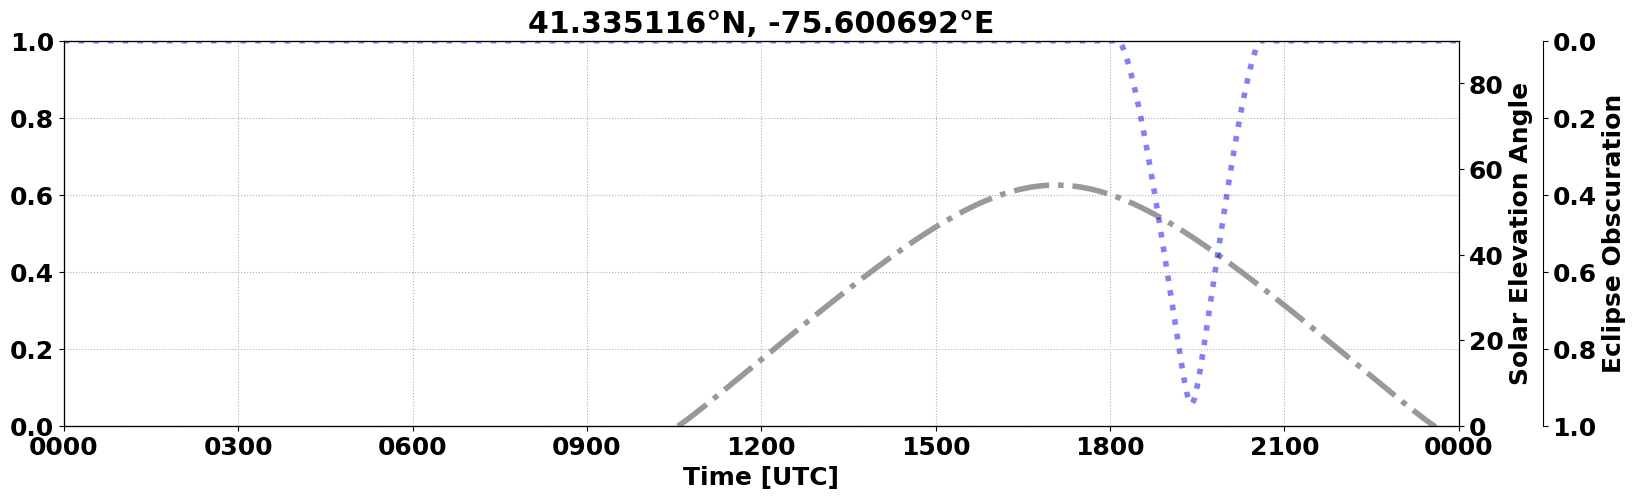

In [5]:
# Plot results - Elevation Angle
fig      = plt.figure(figsize=(18,5))
ax       = fig.add_subplot(111)

# Plot whatever variable you want as a function of datetime objects on the ax:
# ax.plot(datetime_objs,variable)

# Overlay the solar elevation and eclipse:
solar.overlaySolarElevation(ax)
solar.overlayEclipse(ax)

ax.set_xlabel('Time [UTC]')
ax.set_title('{!s}\N{DEGREE SIGN}N, {!s}\N{DEGREE SIGN}E'.format(lat,lon))

# Format X-Axis Times to HHMM for easier readability.
xtks    = ax.get_xticks()
xtk_lbs = []
for xtk in xtks:
    xtk_dt = mpl.dates.num2date(xtk)
    xtl    = xtk_dt.strftime('%H%M')
    xtk_lbs.append(xtl)
ax.set_xticks(xtks)
ax.set_xticklabels(xtk_lbs)

plt.show()